## Working with Data Frame

In [136]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from io import StringIO
from pandas import DataFrame                                    # DataFrame, read_csv

X = [1,2,3,4,5]
csv_data = \
 '''A,B,C,D
    1.0,2.0,3.0,14.0
    5.0,6.0,,8.0
    10.0,11.0,12.0,
    '''
df = DataFrame (X,columns=['Number']), print (df)
c=StringIO(csv_data) # print(c.getvalue())
df = pd.read_csv(StringIO(csv_data))
print('Data Frame')                                , print(df)
#print('Count NUll Values in Column')               , print(df.isnull().sum()) 
#print('Remove Row/Column having NaN')              , print(df.dropna(axis=0))  # axis=1 for column removal 
#print('Rows All columns are NaN')                  , print(df.dropna(how='all')) 
#print('Remove Rows have less than 4 real values')  , print(df.dropna(thresh=3)) 
#print('Rows where NaN appear in specific columns '), print(df.dropna(subset=['C'])) 

   color  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1
Data Frame
      A     B     C     D
0   1.0   2.0   3.0  14.0
1   5.0   6.0   NaN   8.0
2  10.0  11.0  12.0   NaN


(None, None)

### Interpolation techniques.

In [148]:
from sklearn.impute import SimpleImputer 
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(df.values)
print(imputed_data)

[[ 1.  2.  3. 14.]
 [ 5.  6. nan  8.]
 [10. 11. 12. nan]]
[[ 1.   2.   3.  14. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.  11. ]]


When we are talking about categorical data, we have to further distinguish between nominal and ordinal features. 
Ordinal features can be understood as categorical values that can be sorted or ordered.

In [253]:
import pandas as pd
df = pd.DataFrame([
                ['green', 'M', 10.1, 'class1'],
                ['red', 'L', 13.5, 'class2'],
                ['blue', 'XL', 15.3, 'class1']
                ])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [250]:
# Mapping ordinal features
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [202]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

### Encoding class labels

In [203]:
import numpy as np
class_mapping = {
    label:idx 
    for idx,
        label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [204]:
# Next, we can use the mapping dictionary to transform the class labels into integers:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [205]:
# We can reverse the key-value pairs in the mapping dictionary as follows to map the 
# converted class labels back to the original string representation:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


### Ecoding Class Labels with scikit-learn

In [206]:
# Alternatively, there is a convenient LabelEncoder class directly implemented in scikit-learn to achieve this:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(df['classlabel'].values)
print(y)

[0 1 0]


In [207]:
# Note that the fit_transform method is just a shortcut for calling fit and transform
# separately, and we can use the inverse_transform method to transform the integer
# class labels back into their original string representation:
le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

# Performing one-hot encoding on nominal features

In [252]:
le = LabelEncoder()
df['lecolor'] = le.fit_transform(df.color)

he = OneHotEncoder()
X  = he.fit_transform(df.lecolor.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Color_"+str(int(i)) for i in range(X.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)
df

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [192]:
import pandas as pd
#Create a test dataframe
df = pd.DataFrame([ ['green', 'Chevrolet', 2017], ['blue', 'BMW', 2015],  ['yellow', 'Lexus', 2018], ])
df.columns = ['color', 'make', 'year']
print(df)
# ****************LABEL ENCODER*******************************
from sklearn.preprocessing import LabelEncoder
le_color = LabelEncoder()
le_make  = LabelEncoder()
df['le_color'] = le_color.fit_transform(df.color)
df['le_make' ] = le_make.fit_transform(df.make)
# ****************ONE HOT ENCODER*******************************
from sklearn.preprocessing import OneHotEncoder
he_color = OneHotEncoder()
he_make  = OneHotEncoder()
X  = he_color.fit_transform(df.le_color.values.reshape(-1,1)).toarray()
Xm = he_make.fit_transform(df.le_make.values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(X, columns = ["Color_"+str(int(i)) for i in range(X.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)

dfOneHot = pd.DataFrame(Xm, columns = ["Make"+str(int(i)) for i in range(X.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)
df

    color       make  year
0   green  Chevrolet  2017
1    blue        BMW  2015
2  yellow      Lexus  2018


,color,make,year,le_color,le_make,Color_0,Color_1,Color_2,Make0,Make1,Make2
0,green,Chevrolet,2017,1,1,0.0,1.0,0.0,0.0,1.0,0.0
1,blue,BMW,2015,0,0,1.0,0.0,0.0,1.0,0.0,0.0
2,yellow,Lexus,2018,2,2,0.0,0.0,1.0,0.0,0.0,1.0


In [178]:
from sklearn.preprocessing import OneHotEncoder
#categorical_features[0]
ohe = OneHotEncoder()#categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [264]:
# pd.get_dummies(df[['price', 'color', 'size']])
dummies= pd.get_dummies(df.color)
merged=pd.concat([df,dummies],axis='columns')
merged
final=merged.drop(['color'],axis='columns')
final

,size,price,classlabel,blue,green,red
0,M,10.1,class1,0,1,0
1,L,13.5,class2,0,0,1
2,XL,15.3,class1,1,0,0


# Partitioning a dataset into separate training and test sets

In [29]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/''ml/machine-learning-databases/''wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines','Proline']
print('Class labels are', np.unique(df_wine['Class label']))
df_wine.head()

Class labels are [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Bringing features onto the same scale

In [33]:
df_wine.isnull().sum()

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [34]:
#from sklearn.impute import SimpleImputer
#imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#Xx_train=imp_mean.fit_transform(X_train)

In [101]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [36]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [265]:
# Expample to show difference between standardised and normalised
ex = np.array([0, 1, 2, 3, 4, 5])
print('standardized:', (ex - ex.mean()) / ex.std())
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


# Selecting meaningful features

In [107]:
# For regularized models in scikit-learn that support L1 regularization, we can simply
# set the penalty parameter to 'l1' to obtain a sparse solution:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [266]:
# Applied to the standardized Wine data, the L1 regularized logistic regression would yield the following sparse solution:
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

NameError: name 'LogisticRegression' is not defined

In [126]:
# Both training and test accuracies (both 100 percent) indicate that our model does a
# perfect job on both datasets. When we access the intercept terms via the
# lr.intercept_ attribute, we can see that the array returns three values:
lr.intercept_

array([-1.26322024, -1.21570934, -2.37030836])

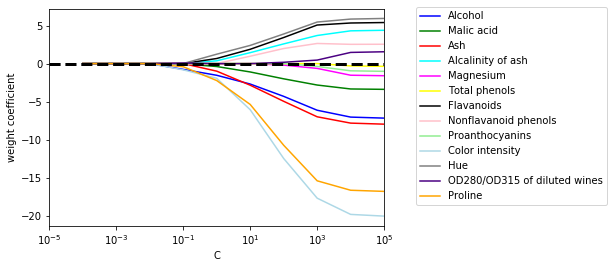

In [128]:
# In the last example on regularization in this chapter, we will vary the regularization
# strength and plot the regularization path—the weight coefficients of the different
# features for different regularization strengths:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow', 'black','pink', 
          'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0, solver='liblinear')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
    label=df_wine.columns[column + 1],
    color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

# Sequential feature selection algorithms

In [37]:
# Unfortunately, the SBS algorithm has not been implemented in scikit-learn yet. But
# since it is so simple, let us go ahead and implement it in Python from scratch:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
            dim = X_train.shape[1]
            self.indices_ = tuple(range(dim))
            self.subsets_ = [self.indices_]
            score = self._calc_score(X_train, y_train,
            X_test, y_test, self.indices_)
            self.scores_ = [score]
            while dim > self.k_features:
                scores = []
                subsets = []
                for p in combinations(self.indices_, r=dim - 1):
                    score = self._calc_score(X_train, y_train, X_test, y_test, p)
                    scores.append(score)
                    subsets.append(p)
                    best = np.argmax(scores)
                    self.indices_ = subsets[best]
                    self.subsets_.append(self.indices_)
                    dim -= 1
                    self.scores_.append(scores[best])
                    self.k_score_ = self.scores_[-1]
            return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test,indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [42]:
# Now, let us see our SBS implementation in action using the KNN classifier from scikit-learn:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)#.fit(X_train_std, y_train)
sbs.fit(X_train_std, y_train)

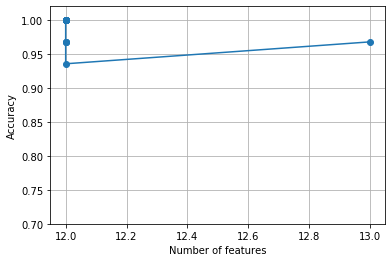

In [41]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [68]:
# To satisfy our own curiosity, let's see what the smallest feature subset (k=3) that
# yielded such a good performance on the validation dataset looks like:
# list(df_wine.columns)
k3 = list(sbs.subsets_[10])
print (k3)
print(df_wine.columns[:][k3])

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12]
Index(['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Proanthocyanins',
       'Color intensity', 'Hue', 'OD280/OD315 of diluted wines'],
      dtype='object')


In [47]:
# Next let's evaluate the performance of the KNN classifier on the original test set:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:'    , knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [46]:
# Now, let us use the selected three-feature subset and see how well KNN performs:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:',     knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9596774193548387
Test accuracy: 0.9814814814814815


# Assessing Feature Importance with Random Forests

 1) Ash                            0.013279
 2) Nonflavanoid phenols           0.013354
 3) Alcalinity of ash              0.022366
 4) Proanthocyanins                0.025570
 5) Malic acid                     0.025648
 6) Magnesium                      0.031357
 7) Total phenols                  0.050872
 8) Hue                            0.058739
 9) Alcohol                        0.118529
10) OD280/OD315 of diluted wines   0.136162
11) Color intensity                0.143920
12) Flavanoids                     0.174751
13) Proline                        0.185453


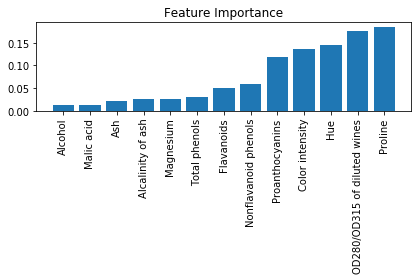

In [82]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [140]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)

print('Number of samples that meet this criterion:', X_selected.shape[0])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

Number of samples that meet this criterion: 124
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
